# Plotting

In this unit, we take a first look at plotting numerical
data. Python itself does not have any built-in
plotting capabilities, so we will be using *matplotlib (MPL)*,
the most popular graphics library for Python.

-   For details on a particular plotting function, see the
    [official documentation](https://matplotlib.org/contents.html).
-   There is an official introductory [tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
    which you can use along-side this unit.

When using matplotlib in interactive Jupyter notebooks (such as this one),
we can enable a more fancy plotting backend that allows us to dynamically
adjust the zoom, etc.
This is done by adding the line
```
%matplotlib widget
```
For this to work, the `ipympl` package needs to be installed,
see [here](https://github.com/matplotlib/ipympl) for details.
Note that this is not supported (and in fact produces a syntax error)
in regular `*.py` Python script files.

In order to access the functions and objects from matplotlib, we
first need to import them. The general convention is to use the
namespace `plt` for this purpose:

In [1]:
import matplotlib.pyplot as plt

***
## Line plots

One of the simplest plots we can generate is a line
defined by a list of points.

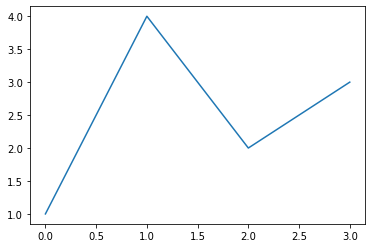

In [2]:
# import matplotlib library
import matplotlib.pyplot as plt

# Plot list of integers
yvalues = [1, 4, 2, 3]
plt.plot(yvalues)

We didn't even have to specify the corresponding $x$-values,
as MPL automatically assumes them to be [0, 1, 2, ...].
Usually, we want to plot for a given set of $x$-values like this:

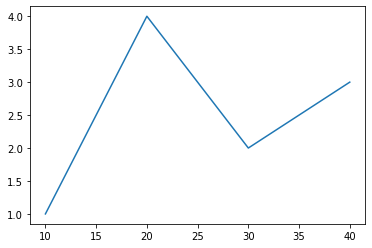

In [3]:
# explicitly specify x-values
xvalues = [10, 20, 30, 40]
plt.plot(xvalues, yvalues)

Similar to Matlab, we can also specify multiple lines to be plotted
in a single graph:

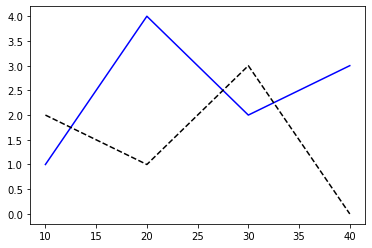

In [4]:
yvalues2 = [2.0, 1.0, 3.0, 0.0]
plt.plot(xvalues, yvalues, 'b-', xvalues, yvalues2, 'k--')

The characters following each set of $y$-values are style specifications
that are very similar to the ones used in Matlab.
More specifically, the letters are short-hand notations for colours:

- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

The remaining characters set the line styles. Valid values are

-   `-` solid line
-   `--` dashed line
-   `-.` dash-dotted line
-   `:` dotted line

It is possible to use any RGB colour or one of the many
predefined named colours such as `'red'` or `'blue'` (see [here](https://matplotlib.org/tutorials/colors/colors.html) for details).
Additionally, we can define line styles with custom spacings
between dashes.

Additionally, we can append marker symbols to the style specification.
The most frequently used ones are

- `o`: circle
- `s`: square
- `*`: star
- `x`: x
- `d`: (thin) diamond

The whole list of supported symbols can be found [here](https://matplotlib.org/api/markers_api.html).

Instead of passing multiple values to be plotted at once, 
we can also repeatedly call `plot()` to add additional elements to a graph. 
This is more flexible since we can pass additional arguments which are 
specific to one particular set of data, such as labels displayed in legends

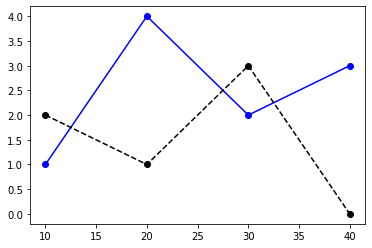

In [5]:
# Plot two lines by calling plot() twice
plt.plot(xvalues, yvalues, 'b-o')
plt.plot(xvalues, yvalues2, 'k--o')

Individual calls to `plot()` also allow us to specify styles
more explicitly using keyword arguments:

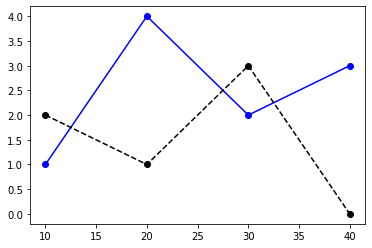

In [6]:
# pass plot styles as explicit keyword arguments
plt.plot(xvalues, yvalues, color='blue', linestyle='-', marker='o')
plt.plot(xvalues, yvalues2, color='black', linestyle='--', marker='o')

Matplotlib accepts abbreviations for the most common 
style definitions using the following shortcuts:

- `c` or `color`
- `ls` or `linestyle`
- `lw` or `linewidth`

We can write thus rewrite the above code as follows:

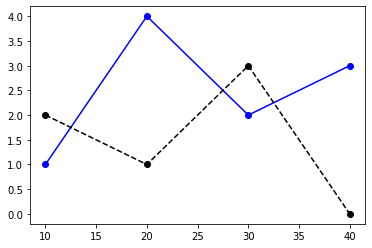

In [7]:
# abbreviate plot style keywords
plt.plot(xvalues, yvalues, c='blue', ls='-', marker='o')
plt.plot(xvalues, yvalues2, c='black', ls='--', marker='o')

There is a third way to plot multiple lines in the same plot by 
passing the $y$-values as a 2-dimensional array. We explore this
alternative in the exercises.

## Scatter plots

We use the `scatter()` function to create scatter plots in a similar fashion to line plots:

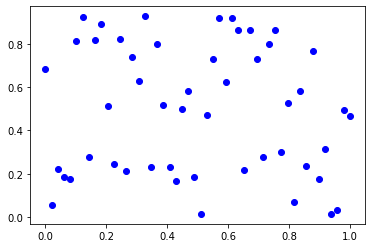

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create 50 uniformly-spaced values on unit interval
xvalues = np.linspace(0.0, 1.0, 50)
# Draw random numbers (we learn how to do this in a later unit)
yvalues = np.random.default_rng(123).random(50)

plt.scatter(xvalues, yvalues, color='blue')

We could in principle create scatter plots using `plot()` by turning
off the connecting lines. However, `scatter()` allows
us to specify the color and marker size as collections, so
we can vary these for every point. `plot()`, on the other hand, imposes
the same style on all points plotted in that particular function call.

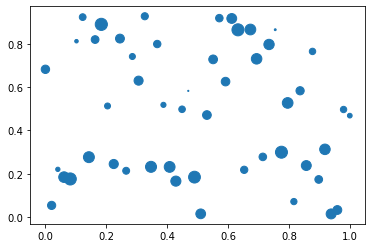

In [9]:
# Draw random marker sizes
size = np.random.default_rng(456).random(len(yvalues)) * 150.0

# plot with point-specific marker sizes
plt.scatter(xvalues, yvalues, s=size)

***
## Plotting categorical data

Instead of numerical values on the x-axis, we can also plot categorical
variables by passing them directly to the plotting function.

For example, assume we have three categories and each has an associated
numerical value:

Text(0.5, 1.0, 'Population')

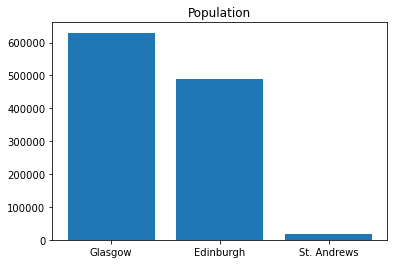

In [10]:
import matplotlib.pyplot as plt

cities = ['Glasgow', 'Edinburgh', 'St. Andrews']
population = [630000, 488000,  16800]
plt.bar(cities, population)
plt.title('Population')

We use `barh()` to create *horizontal* bars:

Text(0.5, 0, 'Population')

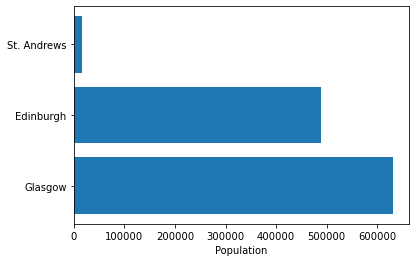

In [11]:
plt.barh(cities, population)
plt.xlabel('Population')

***
## Adding labels and annotations

Matplotlib has numerous functions to add labels and annotations:

-   Use `title()` and `suptitle()` to add titles to your graphs.
    The latter adds a title for the whole figure, which might
    span multiple plots (axes).
-   We can add axis labels by calling `xlabel()` and `ylabel()`.
-   To add a legend, call `legend()`, which in its most simple
    form takes a list of labels which are in the same order
    as the plotted data.
    [[documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)]
-   Use `text()` to add additional text at arbitrary locations.
    [[documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html)]
-   Use `annotate()` to display text next to some data point;
    it's easier to position correctly than `text()` and you
    can add arrows!
    [[documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html)]

Text(20, -20, 'Point 2')

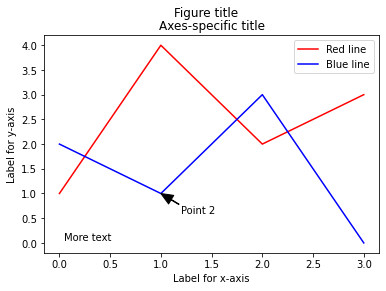

In [12]:
import matplotlib.pyplot as plt

xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

plt.plot(xvalues, yvalues, 'r', xvalues, yvalues2, 'b')
plt.suptitle('Figure title')
plt.title('Axes-specific title')
plt.xlabel('Label for x-axis')
plt.ylabel('Label for y-axis')
plt.legend(['Red line', 'Blue line'])

# Adds text at data coordinates (0.05, 0.05)
plt.text(0.05, 0.05, 'More text')

# Annotate second point
plt.annotate('Point 2', (xvalues[1], yvalues2[1]), (20, -20),
             textcoords='offset points',
             arrowprops={'facecolor': 'black', 'width': 0.5,
                         'headwidth': 10.0})

***
## Plot limits, ticks and tick labels

We adjust the plot limits, ticks and tick labels as follows:

-   Plotting limits are set using the `xlim()` and `ylim()` functions.
    Each accepts a tuple `(min,max)` to set the desired range.
-   Ticks and tick labels can be set by calling `xticks()` or `yticks()`.


(-1.1, 1.1)

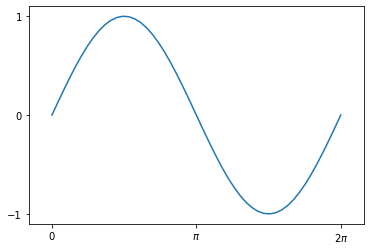

In [13]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(0.0, 2*np.pi, 50)
plt.plot(xvalues, np.sin(xvalues))

# Set major ticks for x and y axes, and xtick labels.
# We can use LaTeX code in labels!
plt.xticks([0.0, np.pi, 2*np.pi], ['0', r'$\pi$', r'$2\pi$'])
plt.yticks([-1.0, 0.0, 1.0])

# Adjust plot limits in x and y direction
plt.xlim((-0.5, 2*np.pi + 0.5))
plt.ylim((-1.1, 1.1))


***
## Object-oriented interface

So far, we have only used the so-called `pyplot` interface which involves
calling *global* plotting functions from `matplotlib.pyplot`.
This interface is intended to be similar to Matlab, but is also somewhat
limited and less clean.

We can instead use the object-oriented interface
(called this way because we call methods of the `Figure` and `Axes` objects).
While there is not much point in using the object-oriented interface
in a Jupyter notebook when we want to create a single graph, it should be the preferred method when
writing re-usable code in Python files.

To use the object-oriented interface, we need to get figure and
axes objects. The easiest way to accomplish this is using
the `subplots()` function, like this:
```
fig, ax = plt.subplots()
```
As an example, we recreate the graph from the section on
labels and annotations using the object-oriented interface:

Text(20, -20, 'Point 2')

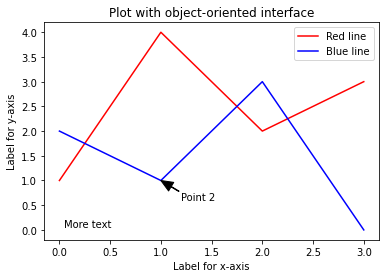

In [14]:
import matplotlib.pyplot as plt

xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

fig, ax = plt.subplots()
ax.plot(xvalues, yvalues, color='red', label='Red line')
ax.plot(xvalues, yvalues2, color='blue', label='Blue line')
ax.set_xlabel('Label for x-axis')
ax.set_ylabel('Label for y-axis')
ax.legend()
ax.set_title('Plot with object-oriented interface')
ax.text(0.05, 0.05, 'More text')

# Annotate second point
plt.annotate('Point 2', (xvalues[1], yvalues2[1]), (20, -20),
             textcoords='offset points',
             arrowprops={'facecolor': 'black', 'width': 0.5,
                         'headwidth': 10.0})


The code is quite similar, except that attributes are set using
the `set_xxx()` methods of the `ax` object. For example,
instead of calling `xlim()`, we use `ax.set_xlim()`.

***
## Working with multiple plots (axes)

The object-oriented interface becomes particularly useful
if we want to create multiple axes (or figures). This can also be achieved
using with the `pyplot` programming model as well, but
is somewhat more obscure.

For example, to create a row with two plots, we use:

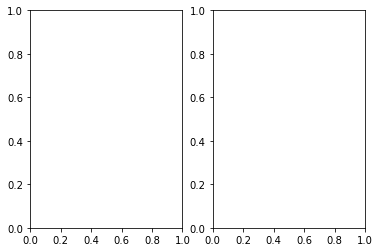

In [15]:
import matplotlib.pyplot as plt

# Create one figure with 2 axes objects, arranged as two columns in a single row
fig, ax = plt.subplots(1, 2)

With multiple axes objects in a single figure (as in the above example), the `ax` returned
by `subplots()` is a NumPy array. Its elements
map to the individual panels within the figure in a natural way.

We can visualise this mapping for the case of a single row
and two columns as follows:

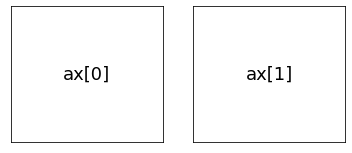

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(6,2.5))
for i, axes in enumerate(ax):
    axes.set_xticks(())
    axes.set_yticks(())
    text = f'ax[{i}]'
    axes.text(0.5, 0.5, text, transform=axes.transAxes, va='center', ha='center', fontsize=18)

Don't worry about the details of how this graph is generated, the only take-away here is
how axes objects are mapped to the panels in the figure.

If we request panels in two dimensions, the `ax` object will be a 2-dimensional
array, and the mapping of axes objects to panels will look like this instead:

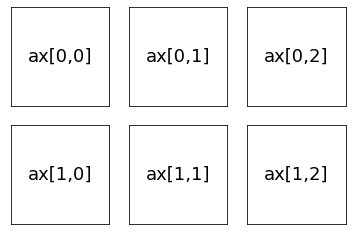

In [17]:
# Request figure with 2 rows, 3 columns
fig, ax = plt.subplots(2, 3, figsize=(6,4))
for i, axrow in enumerate(ax):
    for j, axes in enumerate(axrow):
        axes.set_xticks(())
        axes.set_yticks(())
        text = f'ax[{i},{j}]'
        axes.text(0.5, 0.5, text, transform=axes.transAxes, va='center', ha='center', fontsize=18)

Returning to our initial example, we can use the elements of `ax` to plot into individual panels:

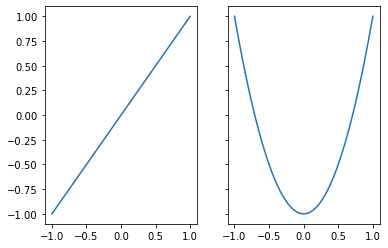

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
xvalues = np.linspace(-1.0, 1.0, 50)

# Plot into first column
ax[0].plot(xvalues, xvalues)

# Plot into second column
ax[1].plot(xvalues, 2*xvalues**2.0 - 1)

The next example illustrates how to create a figure with four panels:

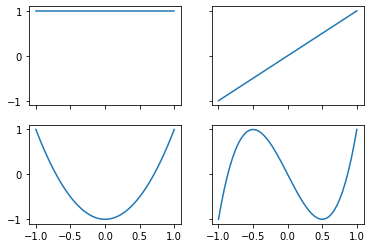

In [19]:
# create figure with 2 rows, 2 columns
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

xvalues = np.linspace(-1.0, 1.0, 50)

# Plot the first four Chebyshev polynomials on the interval [-1,1]
for i in range(2):
    for j in range(2):
        yvalues = np.cos((j + i*2) * np.arccos(xvalues))
        ax[i,j].plot(xvalues, yvalues)

Note the use of `sharex=True` and `sharey=True`. This tells
matplotlib that all axes share the same plot limits, so the
tick labels can be omitted in the figure's interior to
preserve space.

With multiple axes per figure, we can also see the difference between
the labels generated by `set_title()` and `suptitle()`.

To illustrate, we re-use the previous example with two panels 
in a single row:

Text(0.5, 1.02, 'Figure title')

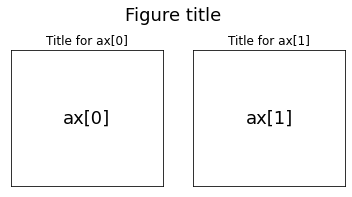

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(6,2.5))
for i, axes in enumerate(ax):
    axes.set_xticks(())
    axes.set_yticks(())
    text = f'ax[{i}]'
    axes.text(0.5, 0.5, text, transform=axes.transAxes, va='center', ha='center', fontsize=18)
    
    # Add axes-specific title
    axes.set_title(f'Title for ax[{i}]')
    
# set overall figure title:
# this is an attribute of the Figure object!
fig.suptitle('Figure title', fontsize=18, va='bottom', y=1.02)

***
## Exercises

### Exercise 1: Trigonometric functions

Plot the functions $\sin(x)$ and $\cos(x)$ on the interval
$[-\pi, \pi]$, each in a separate graph.
Include a legend for each plot, and add pretty tick
labels at $[-\pi, 0, \pi]$ which use the $\LaTeX$ symbol for $\pi$.
Add an overall title "Trigonometric functions".

*Hint:* NumPy defines the functions `np.sin()` and `np.cos()` as well
as the value `np.pi`.

### Exercise 2: Logarithmic scaling

In economics and finance, we often plot using the $\log_{10}$ scale
if the plotted data is of very different orders of magnitude.

Create a figure with two sub-plots, each plotting the
function $f(x) = 10^x$ on a uniformly-spaced interval
$[-5,5]$ with 100 points.
Use the (default) linear scale in the first plot, but
apply the $\log_{10}$ scale in the second.

*Hint:* You can set the axis scale to log by calling
`yscale('log')`, or `set_yscale('log')` when using
the object-oriented interface.

### Exercise 3: Multiple lines in single plot

In this exercise, we explore yet another alternative to
plot multiple lines in a single graph.

The `plot()` function accepts $y$-values specified as a matrix
in which each column corresponds to a different line.
The number of rows must correspond to the 
common vector of $x$-values.

1.  Consider the following family of polynomials in $x$ parametrised by $a$:
    $$
    p(x;a) = a(x-0.5)^2
    $$
    
    Assume there are 5 such polynomials with $a$'s given by the values
    ```
    a = np.linspace(0.4, 4.0, 5)
    ```
    
    -   Create a common set of $x$-values using an equidistant grid
        of 50 points on the interval $[0,1]$.
    -   Construct the matrix of $y$-values with shape `(50,5)` and
        plot all polynomials with a single call to
        `plot()`.
    -   Add a legend that maps a value of $a$ to the corresponding
        line in the plot.
    
2.  Plot each polynomial separately using a loop.
    Use the `i`-th elements of the following arrays as plot
    styles for the `i`-th polynomial:
    
    ```
    colors = ['red', 'blue', 'black', 'green', 'purple']
    linewidths = [1.0, 1.5, 2.0, 1.5, 1.0]
    linestyles = ['-', '--', '-.', ':', '-']
    ```
    
    Add a legend that maps a value of $a$ to the corresponding line in the plot.
    

***
## Solutions

### Solution for exercise 1

Text(0.5, 0.98, 'Trigonometric functions')

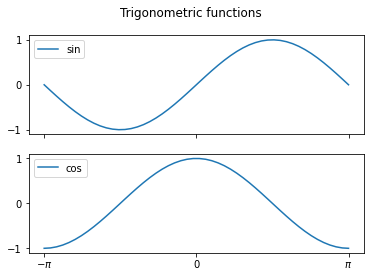

In [21]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(-np.pi, np.pi, 50)
# Create figure with two rows, one column
fig, ax = plt.subplots(2, 1, sharey=True, sharex=True)

xticks = [-np.pi, 0.0, np.pi]
xticklabels = [r'$-\pi$', '0', r'$\pi$']
yticks = [-1.0, 0.0, 1.0]

# Create sin() plot using first axes object
ax[0].plot(xvalues, np.sin(xvalues), label='sin')
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticklabels)
ax[0].set_yticks(yticks)
ax[0].legend(loc='upper left')

# Create cos() plot using second axes object
ax[1].plot(xvalues, np.cos(xvalues), label='cos')
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticklabels)
ax[1].set_yticks(yticks)
ax[1].legend(loc='upper left')

# Add overall figure title (this is not axes-specific)
fig.suptitle('Trigonometric functions')

### Solution for exercise 2

Text(0.5, 1.0, 'Log scale')

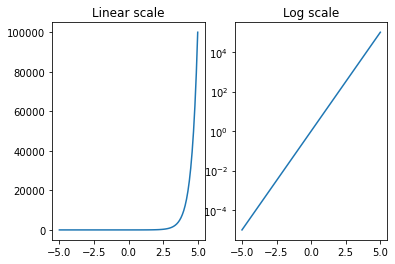

In [22]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(-5.0, 5.0, 100)
fig, ax = plt.subplots(1, 2, sharex=True)
ax[0].plot(xvalues, 10.0**xvalues)
ax[0].set_title('Linear scale')

ax[1].plot(xvalues, 10.0**xvalues)
# Set y-axis to log scale (assumes base-10 log)
ax[1].set_yscale('log')
ax[1].set_title('Log scale')

### Solution for exercise 3

First we plot all polynomials in a single call to `plot()`.
For this to work, we need to pass the $y$-values as a 
matrix where each column corresponds to a different line.

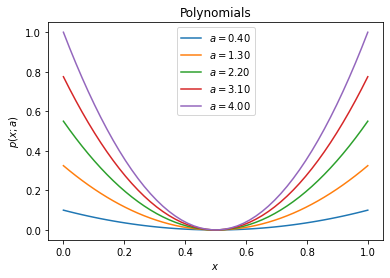

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create common x-values
xvalues = np.linspace(0.0, 1.0, 50)

# Create parameters
a = np.linspace(0.4, 4.0, 5)

# Evaluate polynomials on common x-values:
# each column corresponds to a different parametrisation
poly = np.zeros((len(xvalues), len(a)))
# Iterate over parameters and create each set of corresponding y-values
for i, ai in enumerate(a):
    poly[:,i] = ai * (xvalues - 0.5)**2.0

plt.plot(xvalues, poly)
plt.xlabel('$x$')
plt.ylabel(r'$p(x;a)$')
plt.title('Polynomials')

# Create legend:
# we need to pass in labels in same order 
# as the corresponding columns
labels = [r'$a={:.2f}$'.format(ai) for ai in a]
plt.legend(labels)


We now call `plot()` for each polynomial separately.
This allows us to specify detailed style settings
for each line.

Text(0.5, 1.0, 'Polynomials')

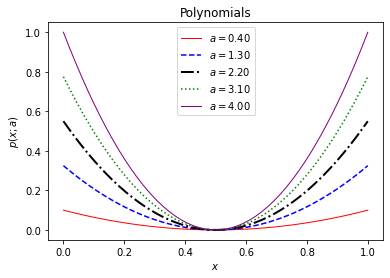

In [24]:
fig, ax = plt.subplots(1,1)

# Different styles for each parametrisation
colors = ['red', 'blue', 'black', 'green', 'purple']
linewidths = [1.0, 1.5, 2.0, 1.5, 1.0]
linestyles = ['-', '--', '-.', ':', '-']

n = poly.shape[1]
for i in range(n):
    label = r'$a={:.2f}$'.format(a[i])
    ax.plot(xvalues, poly[:,i], c=colors[i], lw=linewidths[i], 
            ls=linestyles[i], label=label)
    
# calling legend without arguments will use the 
# text provided as label argument to each plot()
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p(x;a)$')
ax.set_title('Polynomials')